In [1]:
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
from torch.utils.data import TensorDataset,random_split
from tqdm import tqdm
from sklearn.metrics import confusion_matrix

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import gzip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Ramdom Data generation and loading

In [ ]:
# Generate random tensors for the features and labels
X = torch.randn(2000, 1, 28, 28)  # 2000 samples, 1 channel (grayscale), 28x28 images
y = torch.randint(0, 10, (2000,))  # 2000 labels, 10 classes (0-9)

# Create a DataLoader for the dataset
dummy_dataset = TensorDataset(X, y)

# Split the dataset into a training set and a test set
dummy_train_size = int(0.8 * len(dummy_dataset))
dummy_test_size = len(dummy_dataset) - dummy_train_size
train_dataset, test_dataset = random_split(dummy_dataset, [dummy_train_size, dummy_test_size])
dummy_dataloader_train = DataLoader(train_dataset, batch_size=64, shuffle=True)
dummy_dataloader_test = DataLoader(test_dataset, batch_size=64, shuffle=True)


Displaying randomly generated data with labels(0,9)

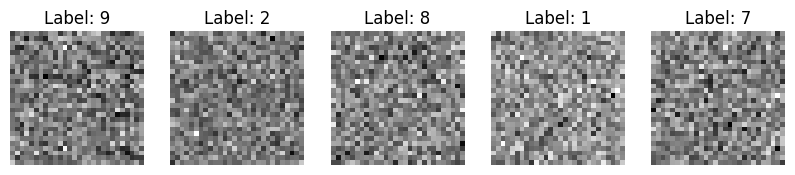

In [ ]:
# Create a function to display images from the dataset
def display_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 3))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i].numpy().squeeze(), cmap='gray')
        ax.set_title(f"Label: {labels[i].item()}")
        ax.axis('off')
    plt.show()

# Display the first 5 images from the dataset
display_images(X, y)


Simple Convolutional Neural Network

In [2]:
# Define the neural network with convolutional layers and dropout
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.dropout1 = nn.Dropout(0.1)
        self.dropout2 = nn.Dropout(0.2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = self.dropout1(x)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = self.dropout2(x)
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

In [ ]:
import torch
import torch.nn as nn

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=4, stride=1, padding=1)  # Convolutional layer with 32 filters, kernel_size=4, stride=2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=1, padding=1)  # Convolutional layer with 64 filters, kernel_size=4, stride=2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling layer with kernel_size=2, stride=2
        self.dropout1 = nn.Dropout(0.1)
        self.dropout2 = nn.Dropout(0.5)
        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(10816, 128)  # First fully connected layer
        self.fc2 = nn.Linear(128, 10)  # Second fully connected layer for classification

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.dropout1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)  # Apply max pooling
        x = torch.flatten(x, 1)  # Flatten the output of the second convolutional layer
        x = torch.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

Trainig dummy dataset

100%|██████████| 150/150 [05:30<00:00,  2.21s/it]


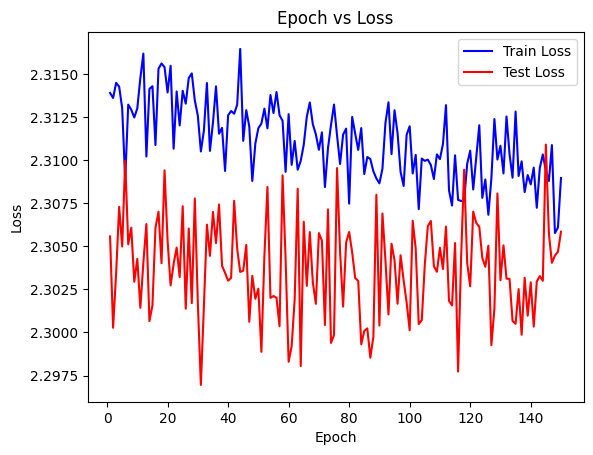

Finished Training


In [ ]:
# Create an instance of the CNN model
model = CNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = torch.optim.SGD(model.parameters(), lr=0.00001,momentum=0.0001,weight_decay=0.0001)  # Stochastic gradient descent optimizer
# optimizer = optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.1))

# Training loop
num_epochs = 150
train_epoch_losses = []
test_epoch_losses = []
for epoch in tqdm(range(num_epochs)):

    # Training
    model.train()
    running_loss_train = 0.0
    for i, data in enumerate(dummy_dataloader_train, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss_train = criterion(outputs, labels)
        loss_train.backward()
        optimizer.step()
        running_loss_train += loss_train.item()

    # Testing
    model.eval()
    running_loss_test = 0.0
    with torch.no_grad():
        for i, data in enumerate(dummy_dataloader_test, 0):
            inputs, labels = data
            outputs = model(inputs)
            loss_test = criterion(outputs, labels)
            running_loss_test += loss_test.item()

    # Calculate the average loss for the epoch
    epoch_loss_train = running_loss_train / len(dummy_dataloader_train)
    epoch_loss_test = running_loss_test / len(dummy_dataloader_test)
    train_epoch_losses.append(epoch_loss_train)
    test_epoch_losses.append(epoch_loss_test)
    # print(f"Epoch {epoch + 1}, Train Loss: {epoch_loss_train:.3f}, Test Loss: {epoch_loss_test:.3f}")

# Plot the loss over epochs
plt.plot(range(1, num_epochs + 1), train_epoch_losses, color='blue', label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_epoch_losses, color='red', label='Test Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()

print('Finished Training')


In [ ]:
# Create an instance of the CNN model
model = CNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
# optimizer = torch.optim.SGD(model.parameters(), lr=0.1,momentum=0.01,weight_decay=0.00001)  # Stochastic gradient descent optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001,momentum=0.01)  # Stochastic gradient descent optimizer
# optimizer = optim.Adam(model.parameters(), lr=0.01)


# Training loop
num_epochs = 100
epoch_losses = []
test_epoch_losses=[]
for epoch in tqdm(range(num_epochs)):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(dummy_dataloader_train, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f"Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}")
            running_loss = 0.0
        # Calculate the average loss for the epoch
    epoch_loss = running_loss / len(dummy_dataloader_train)
    epoch_losses.append(epoch_loss)

    # Testing
    model.eval()
    running_loss_test = 0.0
    with torch.no_grad():
        for i, data in enumerate(dummy_dataloader_test):
            inputs, labels = data
            outputs = model(inputs)
            loss_test = criterion(outputs, labels)
            running_loss_test += loss_test.item()

    # Calculate the average loss for the epoch
    epoch_loss_train = running_loss_train / len(dummy_dataloader_train)
    epoch_loss_test = running_loss_test / len(dummy_dataloader_test)
    train_epoch_losses.append(epoch_loss_train)
    test_epoch_losses.append(epoch_loss_test)

    # print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.3f}")
torch.save(model.state_dict(), "sample_data/simple_cnn_dummy.pth")
# Plot the loss over epochs
plt.plot(range(1, num_epochs + 1), epoch_losses, color='blue', label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_epoch_losses, color='red', label='Test Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()

print('Finished Training')

  0%|          | 0/100 [00:00<?, ?it/s]


NameError: name 'dummy_dataloader_train' is not defined

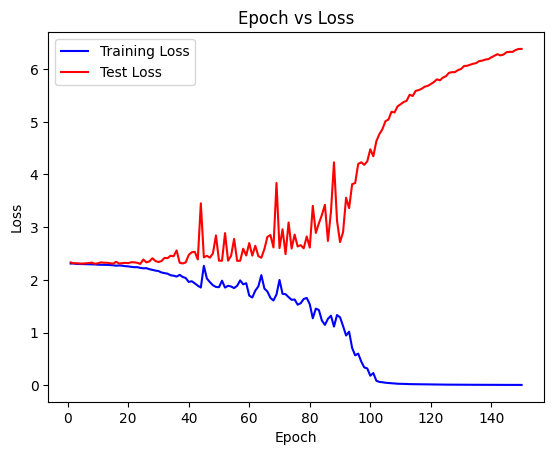

Finished Training


In [ ]:
# Plot the loss over epochs
plt.plot(range(1, num_epochs + 1), epoch_losses, color='blue', label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_epoch_losses, color='red', label='Test Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()

print('Finished Training')

MNIST Data loading

In [4]:
# Load the MNIST dataset and create a DataLoader
mnist_train = MNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
mnist_test = MNIST(root='data', train=False, download=True, transform=transforms.ToTensor())

# Split the training data into a training set and a validation set
mnist_train_size = int(0.8 * len(mnist_train))
mnist_val_size = len(mnist_train) - mnist_train_size
mnist_train_dataset, mnist_val_dataset = random_split(mnist_train, [mnist_train_size, mnist_val_size])

mnist_train_loader = DataLoader(mnist_train_dataset, batch_size=1024, shuffle=True)
mnist_val_loader = DataLoader(mnist_val_dataset, batch_size=1024, shuffle=True)
mnist_test_loader = DataLoader(mnist_test, batch_size=1024, shuffle=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 93390998.33it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 11364639.63it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32674994.91it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7626312.56it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Training MNIST digits

100%|██████████| 20/20 [30:45<00:00, 92.26s/it]


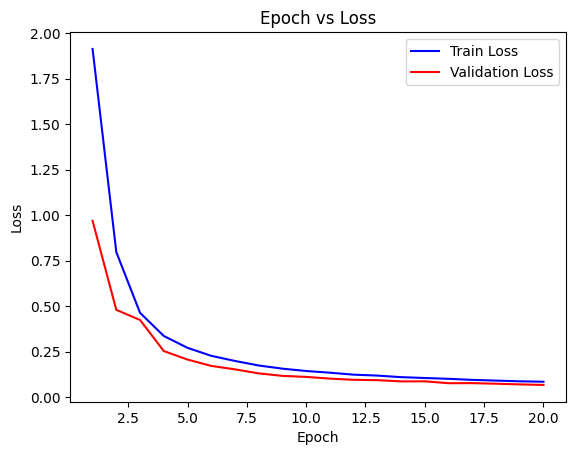

Finished Training


In [5]:
# Create an instance of the CNN model
modelMnist = CNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = torch.optim.SGD(modelMnist.parameters(), lr=0.1,momentum=0.01,weight_decay=0.00001)  # Stochastic gradient descent optimizer
# optimizer = optim.Adam(modelMnist.parameters(), lr=0.1, betas=(0.9,0.99))


# Training loop
num_epochs = 20
train_epoch_losses = []
val_epoch_losses=[]
for epoch in tqdm(range(num_epochs)):
    running_loss = 0.0
    modelMnist.train()
    for i, data in enumerate(mnist_train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = modelMnist(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f"Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}")
            running_loss = 0.0

    # Testing
    modelMnist.eval()
    running_loss_val = 0.0
    with torch.no_grad():
        for i, data in enumerate(mnist_val_loader, 0):
            inputs, labels = data
            outputs = modelMnist(inputs)
            loss_test = criterion(outputs, labels)
            running_loss_val += loss_test.item()

    # Calculate the average loss for the epoch
    epoch_loss_train = running_loss / len(mnist_train_loader)
    epoch_loss_val = running_loss_val / len(mnist_val_loader)
    train_epoch_losses.append(epoch_loss_train)
    val_epoch_losses.append(epoch_loss_val)

    # print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.3f}")
torch.save(modelMnist.state_dict(), "sample_data/simple_cnn_mnist_1b.pth")
# Plot the loss over epochs
plt.plot(range(1, num_epochs + 1), train_epoch_losses, color='blue', label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_epoch_losses, color='red', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()

print('Finished Training')

Accuracy scores

Test Accuracy: 98.16%


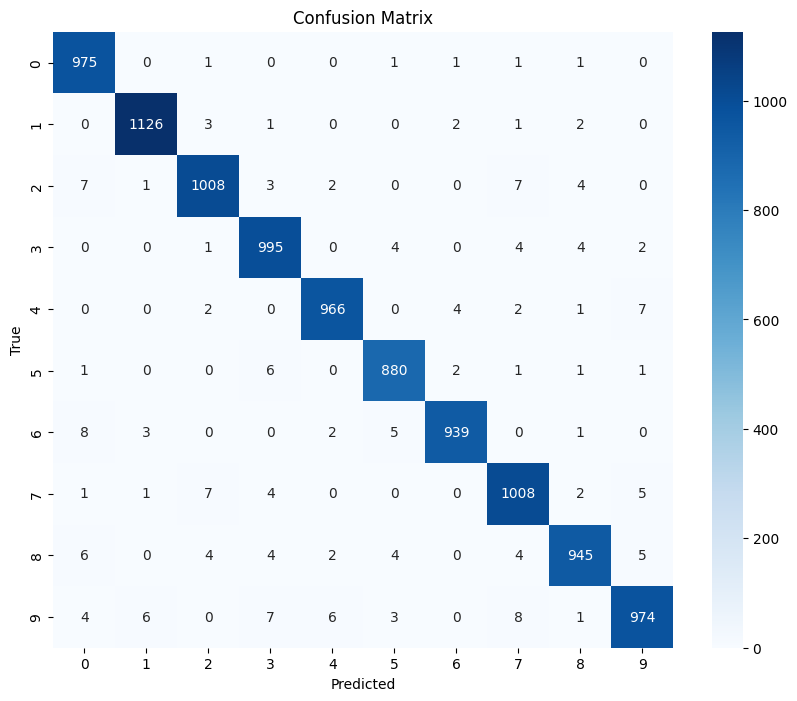

In [6]:
# Evaluate the model on the test set
modelMnist.eval()
correct = 0
total = 0
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in mnist_test_loader:
        outputs = modelMnist(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

print(f'Test Accuracy: {100 * correct / total:.2f}%')


# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN) for each class
TP = cm.diagonal()
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP
TN = cm.sum() - (TP + FP + FN)

# Calculate True Positive Rate (TPR) for each class
TPR = TP / (TP + FN)

# Calculate False Positive Rate (FPR) for each class
FPR = FP / (FP + TN)

print(np.mean(TPR))
print(np.mean(FPR))
# Create a classification report
report = classification_report(y_true, y_pred)

# Print the classification report
print(report)

0.9815364775515402
0.0020443419787110643
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
# Create an instance of the CNN model
modelMnist2 = CNN2()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = torch.optim.SGD(modelMnist2.parameters(), lr=0.1,momentum=0.01,weight_decay=0.00001)  # Stochastic gradient descent optimizer
# optimizer = optim.Adam(modelMnist2.parameters(), lr=0.1, betas=(0.9,0.999))


# Training loop
num_epochs = 20
train_epoch_losses = []
val_epoch_losses=[]
for epoch in tqdm(range(num_epochs)):
    running_loss = 0.0
    modelMnist2.train()
    for i, data in enumerate(mnist_train_loader, 0):
        inputs, labels = data
        # print(inputs.shape)
        optimizer.zero_grad()
        outputs = modelMnist2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f"Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}")
            running_loss = 0.0

    # Testing
    modelMnist2.eval()
    running_loss_val = 0.0
    with torch.no_grad():
        for i, data in enumerate(mnist_val_loader, 0):
            inputs, labels = data
            outputs = modelMnist2(inputs)
            loss_test = criterion(outputs, labels)
            running_loss_val += loss_test.item()

    # Calculate the average loss for the epoch
    epoch_loss_train = running_loss / len(mnist_train_loader)
    epoch_loss_val = running_loss_val / len(mnist_val_loader)
    train_epoch_losses.append(epoch_loss_train)
    val_epoch_losses.append(epoch_loss_val)

    # print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.3f}")
torch.save(modelMnist2.state_dict(), "sample_data/simple_cnn2_mnist_3b.pth")
# Plot the loss over epochs
plt.plot(range(1, num_epochs + 1), train_epoch_losses, color='blue', label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_epoch_losses, color='red', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()

print('Finished Training')

 25%|██▌       | 5/20 [23:45<1:11:16, 285.08s/it]


KeyboardInterrupt: 

Test Accuracy: 98.33%


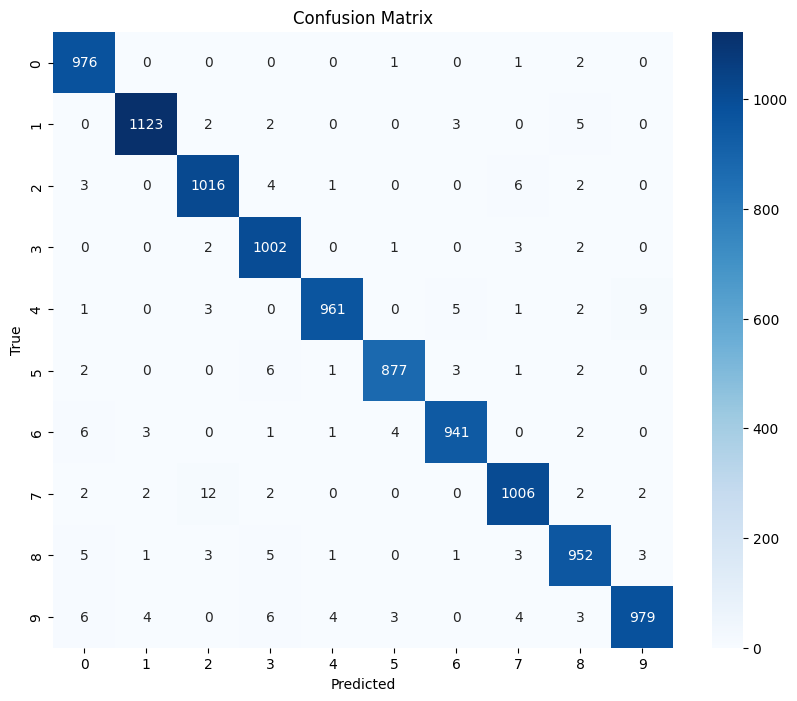

In [ ]:
# Evaluate the model on the test set
modelMnist2.eval()
correct = 0
total = 0
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in mnist_test_loader:
        outputs = modelMnist2(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

print(f'Test Accuracy: {100 * correct / total:.2f}%')


# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=list(range(10)), yticklabels=list(range(10)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Create an instance of the CNN model
modelMnist2 = CNN2()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = torch.optim.SGD(modelMnist2.parameters(), lr=0.001,momentum=0.1,weight_decay=0.00001)  # Stochastic gradient descent optimizer
# optimizer = optim.Adam(model.parameters(), lr=0.01)


# Training loop
num_epochs = 20
train_epoch_losses = []
val_epoch_losses=[]
for epoch in tqdm(range(num_epochs)):
    running_loss = 0.0
    modelMnist2.train()
    for i, data in enumerate(mnist_train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = modelMnist2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f"Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}")
            running_loss = 0.0

    # Testing
    modelMnist2.eval()
    running_loss_val = 0.0
    with torch.no_grad():
        for i, data in enumerate(mnist_val_loader, 0):
            inputs, labels = data
            outputs = modelMnist2(inputs)
            loss_test = criterion(outputs, labels)
            running_loss_val += loss_test.item()

    # Calculate the average loss for the epoch
    epoch_loss_train = running_loss / len(mnist_train_loader)
    epoch_loss_val = running_loss_val / len(mnist_val_loader)
    train_epoch_losses.append(epoch_loss_train)
    val_epoch_losses.append(epoch_loss_val)

    # print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.3f}")
torch.save(modelMnist2.state_dict(), "sample_data/simple_cnn_mnist_1.pth")
# Plot the loss over epochs
plt.plot(range(1, num_epochs + 1), train_epoch_losses, color='blue', label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_epoch_losses, color='red', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()

print('Finished Training')